In this NoteBook, I will be analysing the equity schemes on the basis of visualization created from different parameters.

In [11]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
df_schemes = pd.read_excel('/Users/AribM/Desktop/Mutual Funds India-Data Analysis/processed_data.xlsx')

In [12]:
# Filtering out Bad performing funds from the df and storing the rest in new df
df_filtered = df_schemes[
    ((df_schemes['Sharpe_annual'] > 0) &               # Keep funds with positive Sharpe
    (df_schemes['Sortino_Ratio'] > 0)   )            # Keep funds with decent risk-adjusted returns
]


In [35]:
# Equity funds with high return, high risk and overall good performance 
# Suitable for people with high risk appetite and long term for better returns
# Conservative investors might opt for these funds for balanced portfolio
df_high_risk = df_filtered[
    (df_filtered['Scheme_Category'].str.contains("Equity Scheme", na=False)) & 
    (df_filtered['CAGR'] > 20) & 
    (df_filtered['Sharpe_annual'] > 1.0) & 
    (df_filtered['Sortino_Ratio'] > 1.0)]

In [36]:
# Top funds in the df_top_equity_funds (high risk and high return perspective) :
df_top_equity_funds = df_high_risk
# Removing funds which are same but of different options like direct, regular, idcw etc. and keeping only highest CAGR funds
df_top_equity_funds = df_top_equity_funds.sort_values(by='CAGR',ascending=False)
df_top_equity_funds.drop_duplicates(subset=['Fund_House','Scheme_Type','Scheme_Category'],inplace=True)
# If fund house, scheme type and category are same then the two funds are either same or of direct, regular, idcw etc. types and since data is sorted we remove the schemes with lesser CAGR.
df_top_equity_funds.head(5)

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,std_dev,active_years,CAGR,Sortino_Ratio,Sharpe_annual
4933,Union Mutual Fund,Open Ended Schemes,Equity Scheme - Mid Cap Fund,148074,Union Midcap Fund - Direct Plan - IDCW Option,0.996,3,42.334,2.150041,2.351461
4880,Bandhan Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,147946,BANDHAN EMERGING BUSINESSES FUND - DIRECT PLAN...,1.082,3,33.355,1.580339,1.793028
4993,Bank of India Mutual Fund,Open Ended Schemes,Equity Scheme - Multi Cap Fund,148404,BANK OF INDIA Flexi Cap Fund Direct Plan -Growth,0.985,3,31.248,1.587556,1.840849
4215,Bank of India Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,145678,BANK OF INDIA Small Cap Fund Direct Plan Growth,1.108,5,30.336,1.437974,1.624118
4325,Edelweiss Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,146196,Edelweiss Small Cap Fund - Direct Plan - Growth,1.153,4,30.225,1.372348,1.564562


The above Equity Funds are high return funds suitable for different types of investors depending on their portfolio.

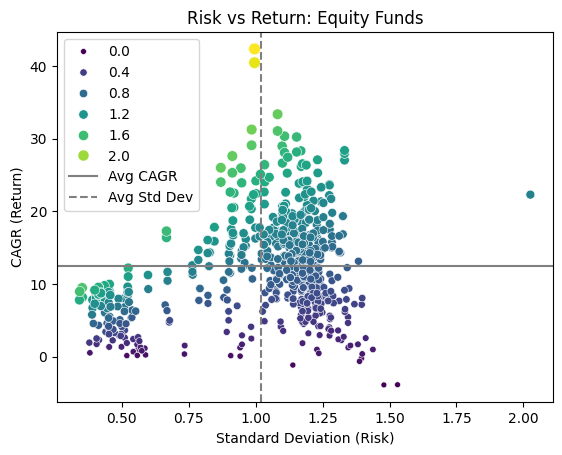

In [15]:
# Let's Analyse the relation of different terms in Equity Schemes with visualizations
# Risk Vs Return Scatterplot (Standard Deviation VS CAGR) of Equity Schemes
df_equity = df_schemes[df_schemes['Scheme_Category'].str.contains("Equity",na=False)]
df_equity = df_equity.dropna()
sns.scatterplot(data=df_equity,x='std_dev',y='CAGR',size='Sharpe_annual',hue='Sharpe_annual',palette='viridis')
plt.axhline(df_equity['CAGR'].mean(), linestyle='solid', color='gray', label="Avg CAGR")
plt.axvline(df_equity['std_dev'].mean(), linestyle='dashed', color='gray', label="Avg Std Dev")
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("CAGR (Return)")
plt.title("Risk vs Return: Equity Funds")
plt.legend()
plt.show()

# This scatter plot shows the relation between CAGR and Standard Deviation for Equity Schemes
# Higher CAGR is good for any investor but higher standard deviation is not optimal for doing safer investments

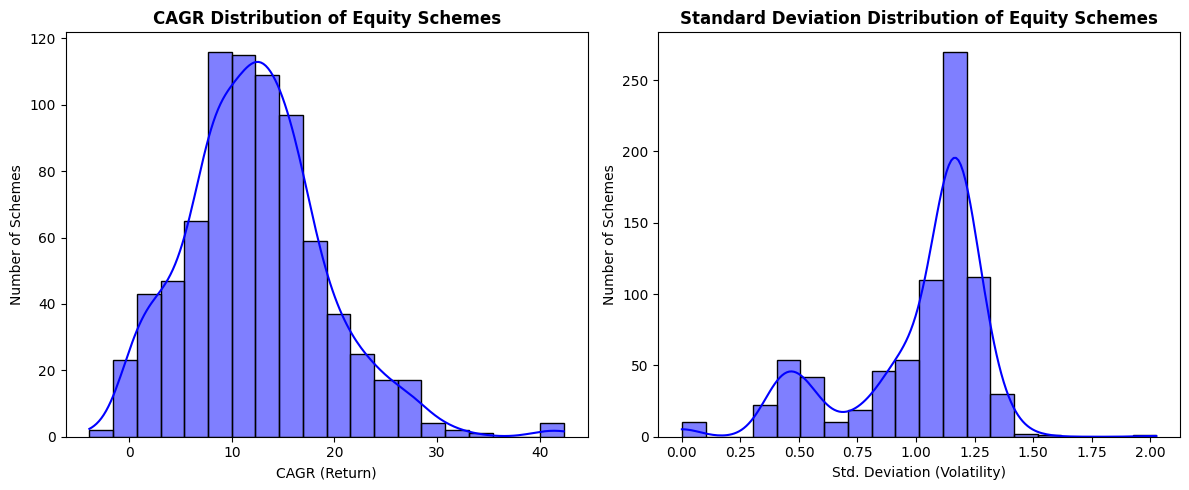

In [16]:
# Histogram for Analysing returns of Equity Schemes and volatility
fig,ax = plt.subplots(1,2,figsize=(12,5))
df_equity = df_schemes[df_schemes['Scheme_Category'].str.contains('Equity',case=False,na=False)]
sns.histplot(data=df_equity['CAGR'],bins=20,kde=True,color='blue',ax=ax[0])
sns.histplot(data=df_equity['std_dev'],bins=20,kde=True,color='blue',ax=ax[1])
# Formatting SubPlot 1
ax[0].set_title("CAGR Distribution of Equity Schemes",fontsize=12,fontweight='bold')
ax[0].set_xlabel('CAGR (Return)',fontsize=10)
ax[0].set_ylabel('Number of Schemes',fontsize=10)
# Formatting Subplot 2
ax[1].set_title("Standard Deviation Distribution of Equity Schemes",fontsize=12,fontweight='bold')
ax[1].set_xlabel('Std. Deviation (Volatility)',fontsize=10)
ax[1].set_ylabel('Number of Schemes',fontsize=10)

fig.tight_layout()


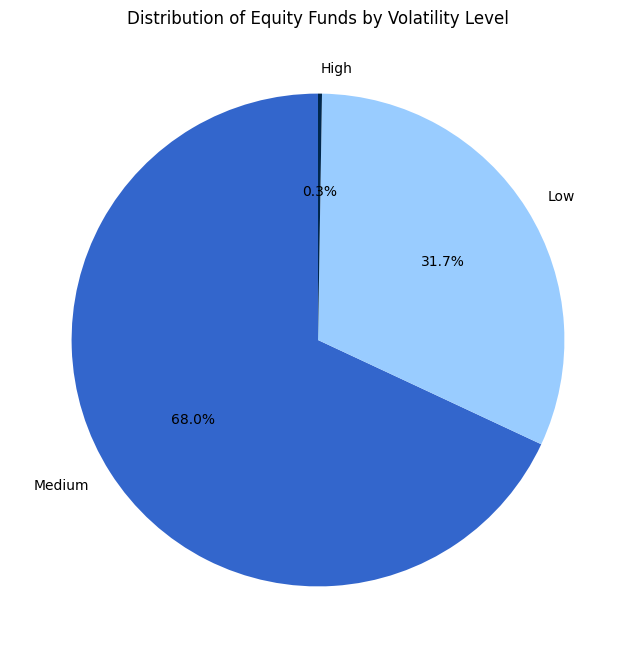

In [17]:
df_equity = df_equity.copy()
df_equity["Volatility_Level"] = pd.cut(
df_equity["std_dev"], 
bins=[0, 1, 1.5, 2.5], 
labels=["Low", "Medium", "High"]
)

plt.figure(figsize=(8,8))
df_equity["Volatility_Level"].value_counts().plot.pie(
    autopct="%1.1f%%", startangle=90, colors=['#3366cc','#99ccff','#00274d']
)
plt.title("Distribution of Equity Funds by Volatility Level")
plt.ylabel("") 
plt.show()


* Funds with the least standard deviations are good for people who want some stability in their high risk portfolios along with above average CAGR
* Also good for conservative investors who don't want high risk even from equity funds

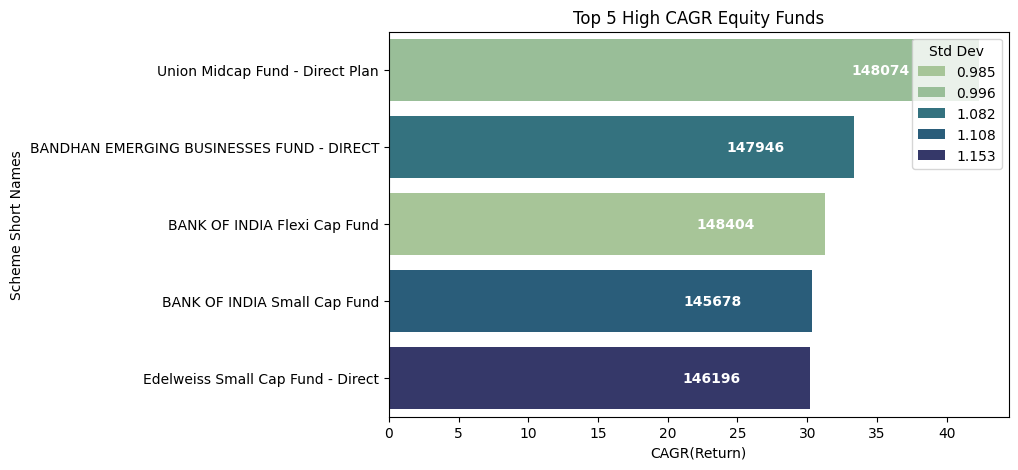

In [34]:
# Plotting the best performing equity funds:
df_top_equity_funds['short_name'] = df_top_equity_funds['Scheme_Name'].apply(lambda x: " ".join(x.split()[:6])).copy()
plt.figure(figsize=(8,5))
sns.barplot(data=df_top_equity_funds.nlargest(5,"CAGR"),x='CAGR',y='short_name',hue='std_dev',palette='crest')
plt.xlabel('CAGR(Return)')
plt.ylabel('Scheme Short Names')
for index, row in enumerate(df_top_equity_funds.nlargest(5, "CAGR").itertuples()):
    plt.text(
        row.CAGR - 5,  # Adjust position to be inside
        index, 
        row.Scheme_Code, 
        ha="right", 
        va="center", 
        fontsize=10, 
        color="white", 
        fontweight="bold"
    )
plt.title("Top 5 High CAGR Equity Funds")
plt.legend(title="Std Dev", loc="upper right")
plt.show()


In [43]:
# Low Volatility Funds for conservative investors who don't want high risk from equity funds:
low_volatility_funds = df_equity[df_equity['Volatility_Level'].str.contains('Low') == True]
# In these funds filtering out the funds with below average returns:
low_volatility_funds = low_volatility_funds[low_volatility_funds['CAGR'] > low_volatility_funds['CAGR'].mean()].sort_values(by='CAGR',ascending=False)
low_volatility_funds = low_volatility_funds.drop_duplicates(subset=['Fund_House','Scheme_Type','Scheme_Category','active_years'])
low_volatility_funds.head(5)

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,std_dev,active_years,CAGR,Sortino_Ratio,Sharpe_annual,Volatility_Level
4933,Union Mutual Fund,Open Ended Schemes,Equity Scheme - Mid Cap Fund,148074,Union Midcap Fund - Direct Plan - IDCW Option,0.996,3,42.334,2.150041,2.351461,Low
4993,Bank of India Mutual Fund,Open Ended Schemes,Equity Scheme - Multi Cap Fund,148404,BANK OF INDIA Flexi Cap Fund Direct Plan -Growth,0.985,3,31.248,1.587556,1.840849,Low
5138,UTI Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,148619,UTI Small Cap Fund - Direct Plan - IDCW (Payout),0.913,3,27.604,1.511147,1.784397,Low
5128,HDFC Mutual Fund,Open Ended Schemes,Equity Scheme - Dividend Yield Fund,148609,HDFC Dividend Yield Fund - Growth Option Direc...,0.870,3,25.994,1.485847,1.772557,Low
5034,Baroda BNP Paribas Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,148474,Baroda BNP Paribas Large and Mid Cap Fund- Dir...,0.945,3,25.943,1.372586,1.636454,Low


* The above funds are low volatility funds (wrt other eq. funds) and have the highest returns one can get with low risk.
* Investors can thus decide what funds to choose based on their goals.